In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [3]:
lx=2100
ly=300
prof_destab=pd.read_csv('f_profiles.dat', sep=' ', names=np.arange(lx), index_col=False)

#mag=pd.read_csv('f_mag.dat', sep=' ', names=['t', 'M'], index_col=False)
#plt.plot(mag.t, mag.M, '-')

In [4]:
k=-2
mp=prof_destab.values[k*ly:(k+1)*ly,:].copy()
vmax=np.abs(np.max(mp))

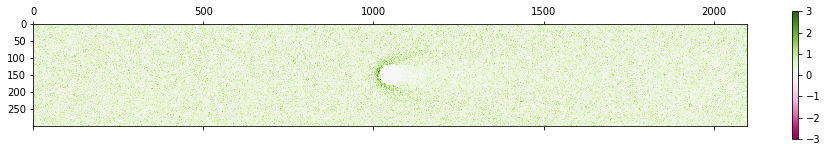

In [5]:
k=298
plt.matshow((prof_destab.values[k*ly:(k+1)*ly,:]), cmap='PiYG', vmin=-vmax, vmax=vmax)
plt.colorbar()
#plt.xlim(900,1200)

(900, 1200)

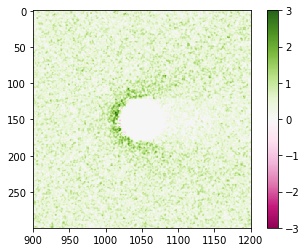

In [6]:
k=-2
plt.imshow((prof_destab.values[k*ly:(k+1)*ly,:]), cmap='PiYG', vmin=-vmax, vmax=vmax)
plt.colorbar()
plt.xlim(900,1200)

In [8]:
prof_destab.shape

(90000, 2100)

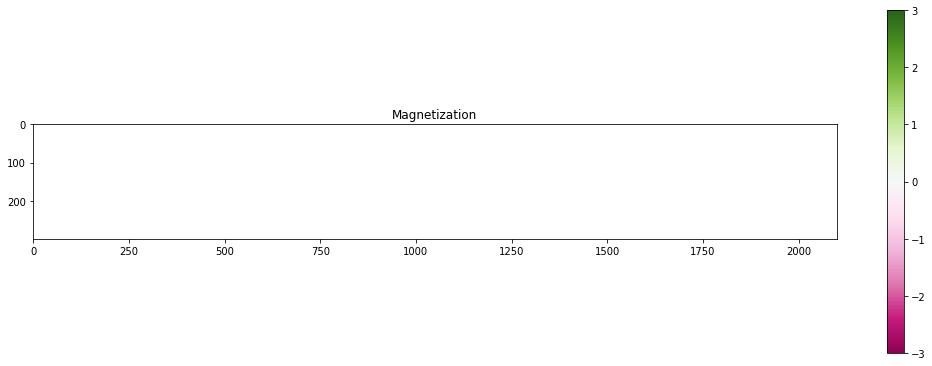

In [10]:
import matplotlib.animation as animation

frame = 0

k=-2
mp=prof_destab.values[k*ly:(k+1)*ly,:].copy()
vmax=np.abs(np.max(mp))

fig, ax = plt.subplots(1, figsize=(18,7))
im0=ax.imshow(prof_destab.values[frame*ly:(frame+1)*ly,:], cmap='PiYG', vmin=-vmax, vmax=vmax, aspect='equal')
plt.colorbar(mappable=im0, shrink=0.9, ax=ax)
ax.set_title(r'Magnetization')

#im1=ax[1].imshow(rhop, cmap='magma', vmin=0, vmax=vmax)
#plt.colorbar(mappable=im1, shrink=0.9);
#ax[1].set_title(r'Density')

def update(*args):
    global frame
    #print(frame)

    #img.set_array(prof_m[frame])
    
    im0.set_array(prof_destab.values[frame*ly:(frame+1)*ly,:])
    #im1.set_array(prof_rho[frame])

    frame+=1
    #frame %= len(prof_m)

    return im0,

ani = animation.FuncAnimation(fig, update, np.int64(prof_destab.shape[0]/300))
writer = animation.FFMpegWriter(fps=20)
ani.save('micro_asympt_prof_v1_beta2_D2_rho5.avi', writer=writer) 